# Summary

In summary, it seems inverse multiquadric interpolation, with degree 0, and a reasonable number of neighbours (e.g., 3 ** 3 = 27) performs best for the kind of sparse data we get from the alignment.  

In [1]:
from helper_loader import *

In [2]:
volume_path = Path("resources/d2783eb27223868f57e159f01ce7a1b2.npz")

In [3]:
aligned_array = np.load(volume_path)["array"]
root_mask_array = load_volume(
    get_structure_mask_path("root", Resolution.MICRONS_25),
    return_raw_array=True,
)

In [4]:
# interpolated_data = interpolate_sparse_3d_array(
#     aligned_array,
#     reference_mask=root_mask_array,
#     kernel="inverse_multiquadric",
#     neighbours=27,
# )

In [5]:
# np.savez_compressed(
#     "resources/30_17-interpolation.27.inverse-multiquadric.npz", array=interpolated_data
# )

In [6]:
interpolated_data = np.load(
    "resources/30_17-interpolation.27.inverse-multiquadric.npz"
)["array"]

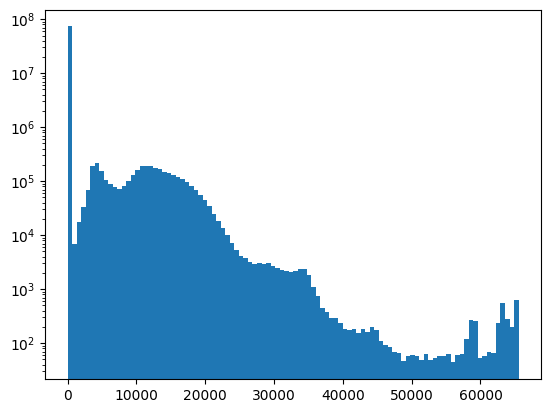

In [7]:
hist(aligned_array.flatten(), log=True, bins=100)

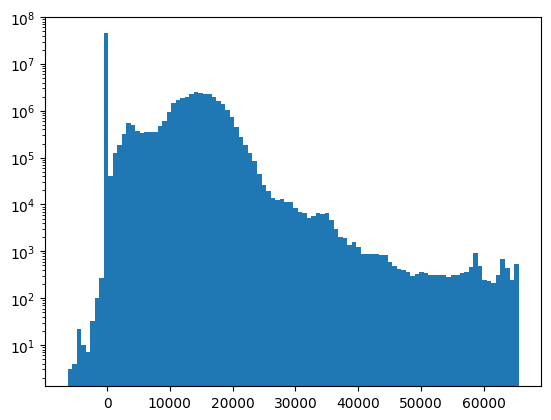

In [8]:
hist(interpolated_data.flatten(), log=True, bins=100)

## Visualising the raw volume

Because there are negative values and the background is 0, we just get a nice rectangular parallelepiped.

In [9]:
raw_volume = vedo.Volume(interpolated_data)
raw_volume.cmap(**get_cmap(raw_volume, vmax=interpolated_data.max()));

In [10]:
show(raw_volume)

## Visualising the clipped volume

In [11]:
clipped_interpolated_data = np.clip(interpolated_data, 0, 2**16 - 1).astype(np.uint16)

clipped_volume = vedo.Volume(clipped_interpolated_data)
clipped_volume.cmap(**get_cmap(clipped_volume));

In [12]:
show(clipped_volume)

## Visualising the bright spots

In [13]:
bright_spots_volume = vedo.Volume(clipped_interpolated_data > 2**16 / 3)
bright_spots_volume.cmap(**get_cmap(bright_spots_volume, vmax=1));

In [14]:
show(bright_spots_volume)

## Visualising slices

In [15]:
def update(index: int = 0) -> None:
    imshow(aligned_array[..., index].T, title="Original", vmin=0, vmax=2**16 - 1)
    imshow(
        clipped_interpolated_data[..., index].T,
        title="Clipped interpolated",
        vmin=0,
        vmax=2**16 - 1,
    )


interact(update, index=(20, 228));

interactive(children=(IntSlider(value=20, description='index', max=228, min=20), Output()), _dom_classes=('wid…